In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('/Users/Ynes/Downloads/stroke_train (1).csv')

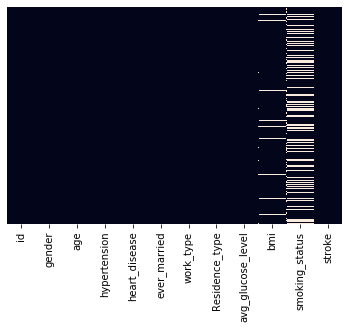

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [62]:
train.head(5)

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other,Residence_type_Urban,ever_married_Yes
0,30669,3.0,0,0,children,95.12,18.0,NaN,0,1,0,0,0
1,30468,58.0,1,0,Private,87.96,39.2,never smoked,0,1,0,1,1
2,16523,8.0,0,0,Private,110.89,17.6,NaN,0,0,0,1,0
3,56543,70.0,0,0,Private,69.04,35.9,formerly smoked,0,0,0,0,1
4,46136,14.0,0,0,Never_worked,161.28,19.1,NaN,0,1,0,0,0


Text(0, 0.5, 'Population Number')

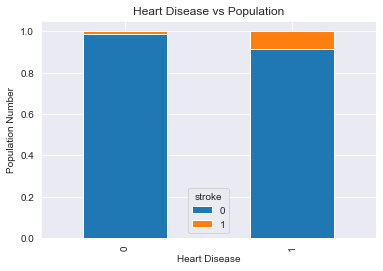

In [68]:
table=pd.crosstab(train.heart_disease,train.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Heart Disease vs Population')
plt.xlabel('Heart Disease')
plt.ylabel('Population Number')

Text(0, 0.5, 'Population Number')

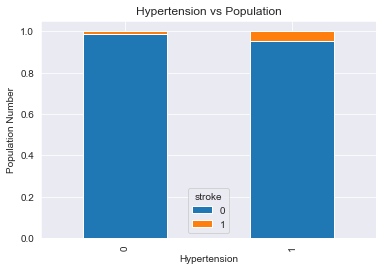

In [67]:
table=pd.crosstab(train.hypertension,train.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Hypertension vs Population')
plt.xlabel('Hypertension')
plt.ylabel('Population Number')

/Users/Ynes/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


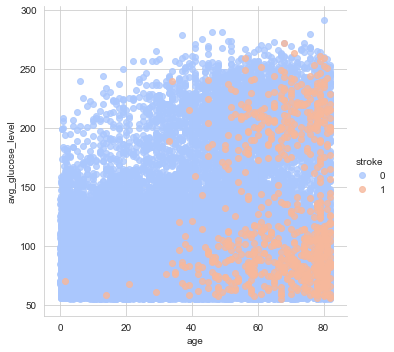

In [12]:
sns.set_style('whitegrid')
sns.lmplot('age','avg_glucose_level',data=train, hue='stroke',
           palette='coolwarm',size=5,aspect=1,fit_reg=False)

In [5]:
#find count of categories in work_type
train.gender.value_counts()

#create dummy variables
gender_dummies = pd.get_dummies(train.gender, prefix='gender').iloc[:, 1:]

# concatenate columns
pd.concat([train, gender_dummies], axis=1)
train = pd.get_dummies(train, columns=['gender'], drop_first=True)
#find count of categories in work_type
train.Residence_type.value_counts()

#create dummy variables
residence_dummies = pd.get_dummies(train.Residence_type, prefix='residence').iloc[:, 1:]

# concatenate columns
pd.concat([train, residence_dummies], axis=1)
train = pd.get_dummies(train, columns=['Residence_type'], drop_first=True)
#find count of categories in work_type
train.ever_married.value_counts()

#create dummy variables
married_dummies = pd.get_dummies(train.ever_married, prefix='ever_married').iloc[:, 1:]

# concatenate columns
pd.concat([train, married_dummies], axis=1)
train = pd.get_dummies(train, columns=['ever_married'], drop_first=True)

#find count of categories in work_type
train.work_type.value_counts()

#create dummy variables
work_dummies = pd.get_dummies(train.work_type, prefix='work_type').iloc[:, 1:]

# concatenate columns
pd.concat([train, work_dummies], axis=1)
dummy_train = pd.get_dummies(train, columns=['work_type'], drop_first=True)

#drop NaN smoking_status rows from dataset
dummy_train.dropna(subset=["smoking_status"], inplace=True)

In [6]:
#create dummy variables
smoking_dummies = pd.get_dummies(dummy_train.smoking_status, prefix='smoking_status').iloc[:, 1:]

#concatenate columns
pd.concat([dummy_train, smoking_dummies], axis=1)
clean_trains = pd.get_dummies(dummy_train, columns=['smoking_status'], drop_first=True)

In [7]:
#Replace all NaN values in bmi with the mean
mean_value = clean_trains['bmi'].mean()
clean_trains['bmi'] = clean_trains['bmi'].fillna(mean_value)

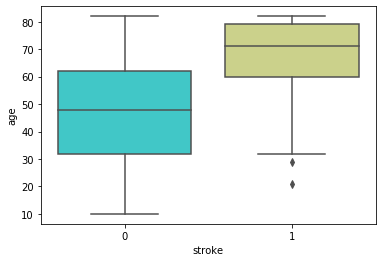

In [11]:
sns.boxplot(x='stroke',y='age',data=clean_trains,palette='rainbow')

In [8]:
clean_trains.drop('id',axis=1,inplace=True)

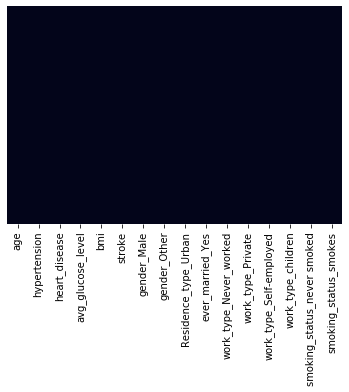

In [9]:
#Rerun the heatmap post cleaning of the data
sns.heatmap(clean_trains.isnull(),yticklabels=False,cbar=False)

In [10]:
clean_trains.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,Residence_type_Urban,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
1,58.0,1,0,87.96,39.2,0,1,0,1,1,0,1,0,0,1,0
3,70.0,0,0,69.04,35.9,0,0,0,0,1,0,1,0,0,0,0
6,52.0,0,0,77.59,17.7,0,0,0,1,1,0,1,0,0,0,0
7,75.0,0,1,243.53,27.0,0,0,0,0,1,0,0,1,0,1,0
8,32.0,0,0,77.67,32.3,0,0,0,0,1,0,1,0,0,0,1


Text(0, 0.5, 'Population Number')

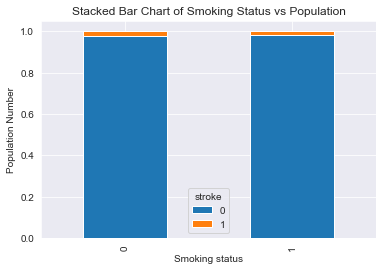

In [72]:
table=pd.crosstab(clean_trains.smoking_status_smokes,clean_trains.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Smoking Status vs Population')
plt.xlabel('Smoking status')
plt.ylabel('Population Number')